In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [10]:
df = pd.read_csv("measured_wasp_17b_params.csv")#, header=None)
df = df.set_index('Parameter')

In [11]:
df

,Model A,Model B,Model B.1
Parameter,,,
i,88.39568159446347+0.8557190483726771-0.9860796...,87.54069213161702+0.43098898185745327-0.514004...,87.30852050543098+0.39644874320137546-0.446981...
P,3.7353984634338695+0.00012925396875784756-0.00...,3.735484831616331+0.0000006232-0.0000016617,3.735484553218816+0.0000018351-0.0000018212
RpRs,0.1203829698708299+0.00046385548844797564-0.00...,0.12130714805888419+0.000404658423926868-0.000...,0.12217592094892667+0.0005177504782353098-0.00...
a/R*,7.39832492366634+0.20282872618265113-0.1335052...,7.190146553234434+0.12385182418808682-0.128598...,7.115132869990389+0.12153948281163807-0.123589...
colour,#ff7f0e,#1f77b4,#2ca02c


In [12]:
df_ref_list = df.columns

# df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
# df_R_list = df.loc['R'] #Planetary radius row
# df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']
# df_sigma_list = df.loc['sigma']
# df_rho_list = df.loc['rho']

# e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
# R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
# a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)
# sigma_list, sigma_ref_list = read_df_params(df_sigma_list, df_ref_list)
# rho_list, rho_ref_list = read_df_params(df_rho_list, df_ref_list)

In [13]:
# Model A, Model B, Model C
# TESS: Sector 12 (batman),	TESS: Sector 12 + Sector 38 (batman),	TESS: Sector 12 + Sector 38 (batman + gp)

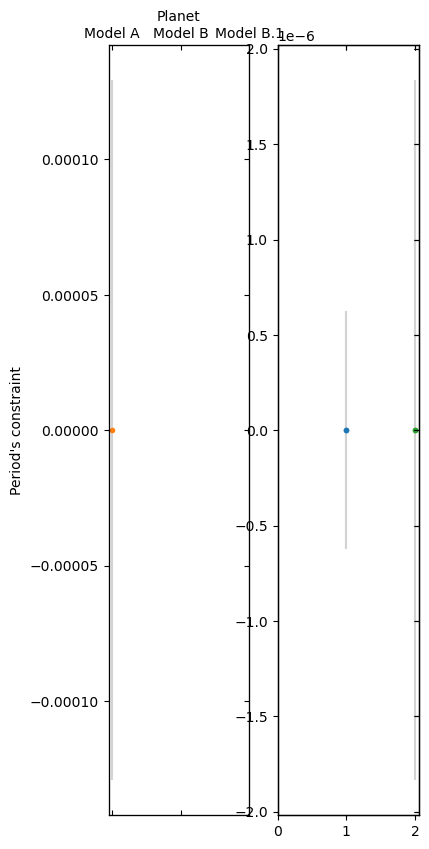

In [42]:
y_list = range(0, len(P_ref_list))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,10))

"""
Period
"""


mu, upper, lower = P_list[0]
sigma = max(abs(upper), abs(lower))
colour = df[P_ref_list[0]]['colour']
ax1.errorbar(0, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# plt.xlim(-0.005, 0.005)

ax1.set_ylabel(r"Period's constraint")

ax1.set_xticklabels([])
ax1.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")

ax1x.set_xlabel("Planet")


"""
RpRs
"""

for obj, author, y in zip(P_list[1:], P_ref_list[1:], y_list[1:]):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    ax2.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
# plt.xlim(-0.005, 0.005)

# ax2.set_ylabel(r"$R_{p}/R_{*}$ constraint")

# ax2.set_xticklabels([])

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")



#
ax1.set_xticks(y_list)
ax1x.set_xticks(y_list)
ax2.set_xticks(y_list)
ax2x.set_xticks(y_list)
ax1x.set_xticklabels(df_ref_list)


# ax.legend()
# fig.tight_layout()
plt.subplots_adjust(hspace=0.0)
plt.show()


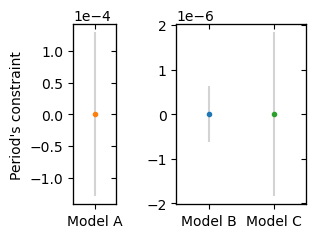

In [103]:
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.125

rect1 = [left, bottom, width*0.333, height]
rect2 = [left+(width*0.333)+0.3, bottom, width, height]


fig = plt.figure(figsize=(2, 2))
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2)

"""
ax1
"""
mu, upper, lower = P_list[0]
sigma = max(abs(upper), abs(lower))
colour = df[P_ref_list[0]]['colour']
ax1.errorbar(0, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")
ax1.set_xlim(-0.5, 0.5)

ax1.set_ylabel(r"Period's constraint")

ax1.set_xticklabels([])
# ax1.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")




"""
ax2
"""

for obj, author, y in zip(P_list[1:], P_ref_list[1:], y_list[1:]):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    colour = df[author]['colour']
    ax2.errorbar(y, 0, yerr=sigma, fmt=".", color=colour, ecolor="LightGrey", label="author")

ax2.set_xlim(0.5, 2.5)
ax2.set_xticklabels([])
# ax2.tick_params(axis="x", which="both", direction="in")

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")


ax1.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
#
ax1.set_xticks([0])
ax1x.set_xticks([0])
ax1.set_xticklabels(["Model A"])
ax2.set_xticks([1, 2])
ax2x.set_xticks([1, 2])
ax2.set_xticklabels(["Model B", "Model C"])

plt.show()